In [3]:
!pip install -qqq mrjob

In [184]:
%%file task1.py

import argparse
from mrjob.job import MRJob, MRStep
from collections import defaultdict

reducer_output = set()
class MRTopQuoteCount(MRJob):
    def mapper_init(self):
        self.cnt = defaultdict(int)

    def mapper(self, _, line):
        if not line.startswith('"character" "dialogue"'):
            _, character, _ = line.split(" ", 2)
            self.cnt[character.strip('"').strip("\\")] += 1

    def mapper_final(self):
        yield from self.cnt.items()

    def reducer_aggregate(self, character, counts):
        yield None, (character, sum(counts))

    def reducer(self, _, pairs):
        char2cnt = [(p[0], p[1]) for p in pairs]
        yield from sorted(char2cnt, key=lambda x: -x[1])[:20]

    def steps(self):
        return [
            MRStep(
                mapper_init=self.mapper_init,
                mapper=self.mapper,
                mapper_final=self.mapper_final,
                reducer=self.reducer_aggregate,
            ),
            MRStep(reducer=self.reducer)
        ]

if __name__ == "__main__":
    MRTopQuoteCount.run()

Overwriting task1.py


In [185]:
!python3 task1.py ../sw-data/SW_EpisodeIV.txt > res4.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192807.049708
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192807.049708/output
Streaming final output from /tmp/task1.root.20231206.192807.049708/output...
Removing temp directory /tmp/task1.root.20231206.192807.049708...


In [186]:
!python3 task1.py ../sw-data/SW_EpisodeV.txt > res5.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192807.862369
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192807.862369/output
Streaming final output from /tmp/task1.root.20231206.192807.862369/output...
Removing temp directory /tmp/task1.root.20231206.192807.862369...


In [187]:
!python3 task1.py ../sw-data/SW_EpisodeVI.txt > res6.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192808.283099
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192808.283099/output
Streaming final output from /tmp/task1.root.20231206.192808.283099/output...
Removing temp directory /tmp/task1.root.20231206.192808.283099...


In [188]:
!cat ../sw-data/SW_Episode*.txt > ../sw-data/SW_full.txt

In [189]:
!python3 task1.py ../sw-data/SW_full.txt > res_full.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192808.961280
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192808.961280/output
Streaming final output from /tmp/task1.root.20231206.192808.961280/output...
Removing temp directory /tmp/task1.root.20231206.192808.961280...


In [190]:
!pip install -qqq matplotlib

In [191]:
import matplotlib.pyplot as plt


def print_result(result, ep):
    with open(result, "r") as file:
        lines = file.readlines()
    names, counts = zip(*(line.split() for line in lines))
    counts = [int(i) for i in counts]
    plt.figure(figsize=(18, 6))
    plt.bar(names, counts)
    plt.xlabel('Character')
    plt.xticks(rotation='vertical')
    plt.ylabel('Quote count')
    plt.title(f'Most talkative characters. {ep}')
    plt.show()

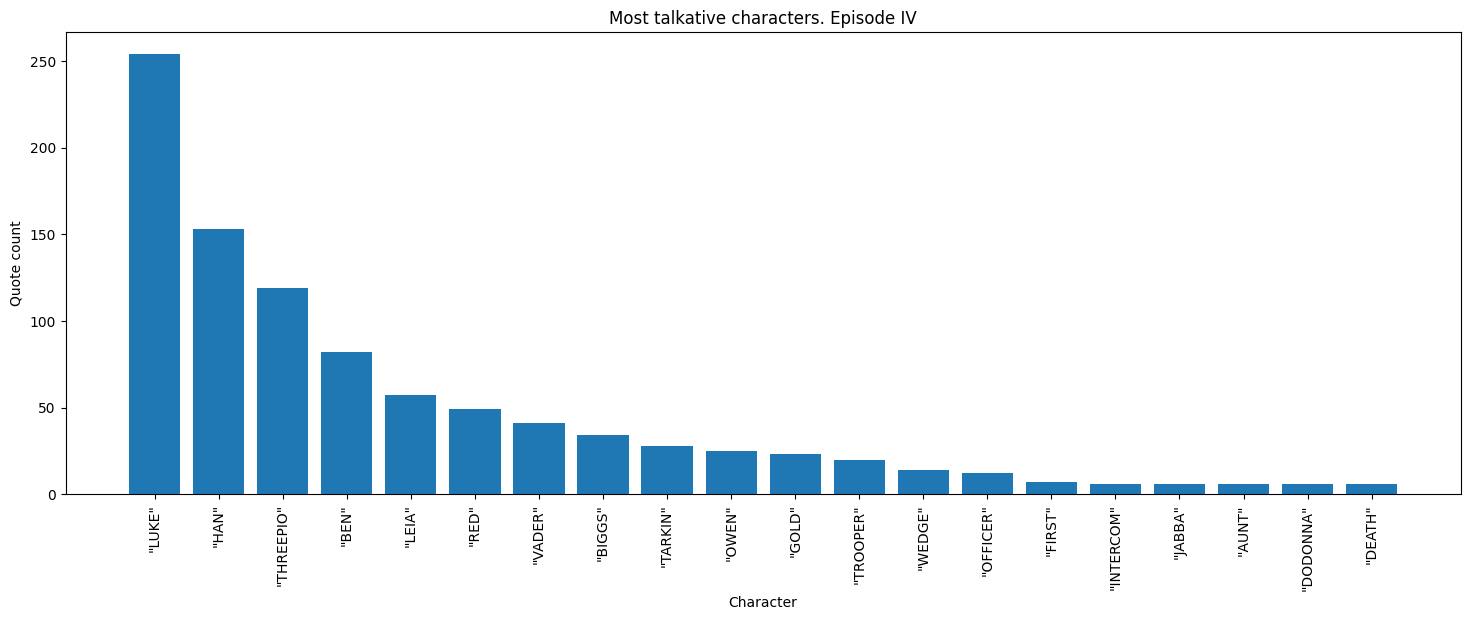

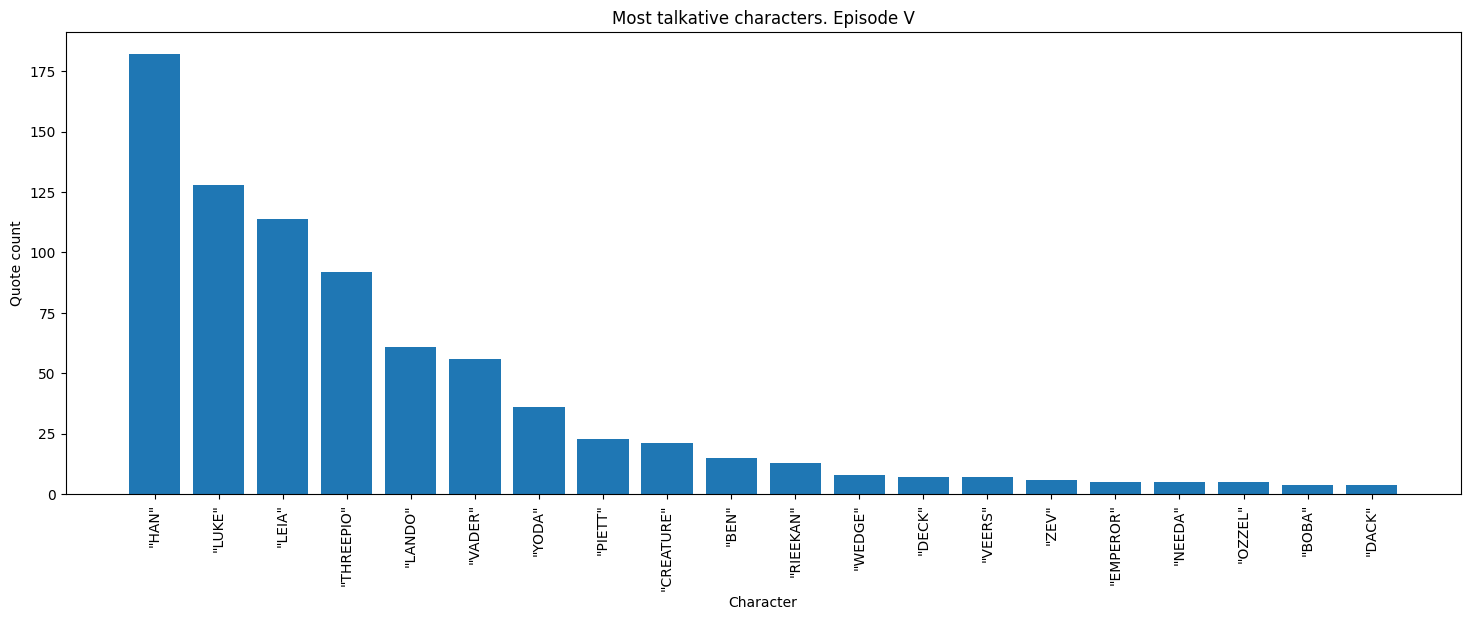

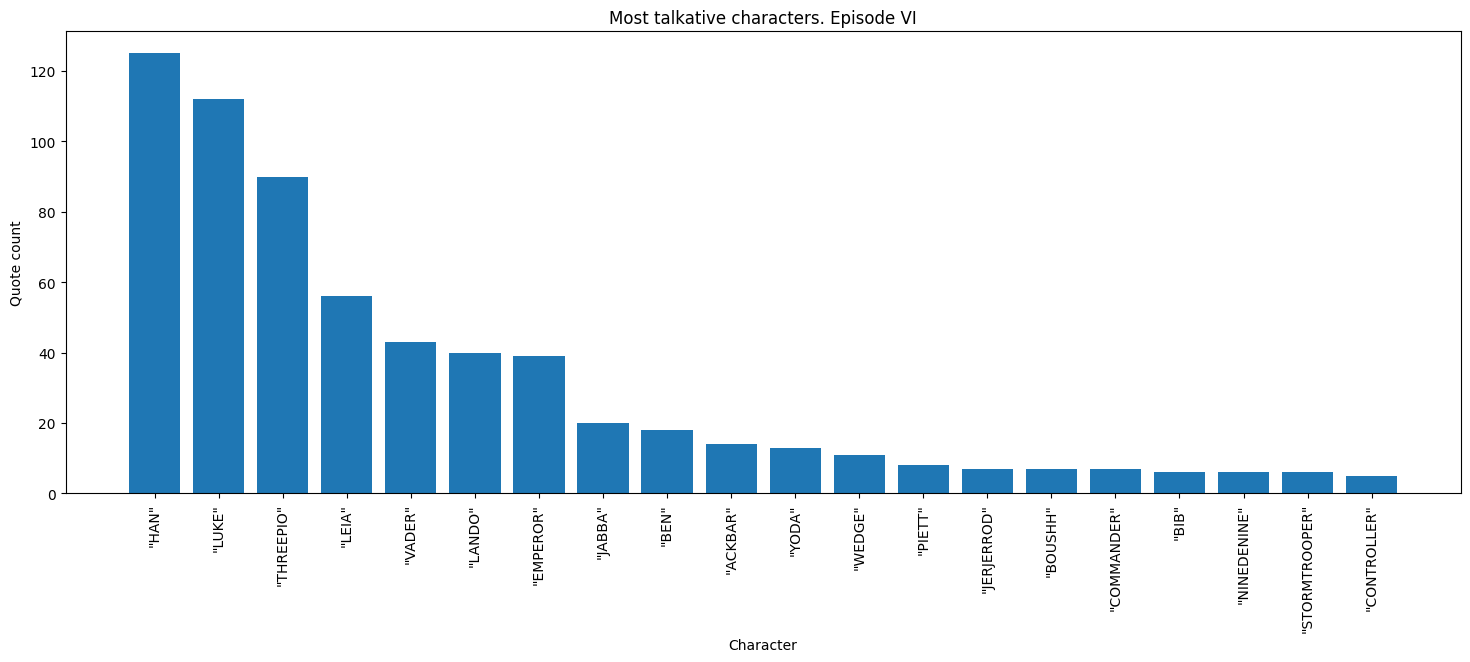

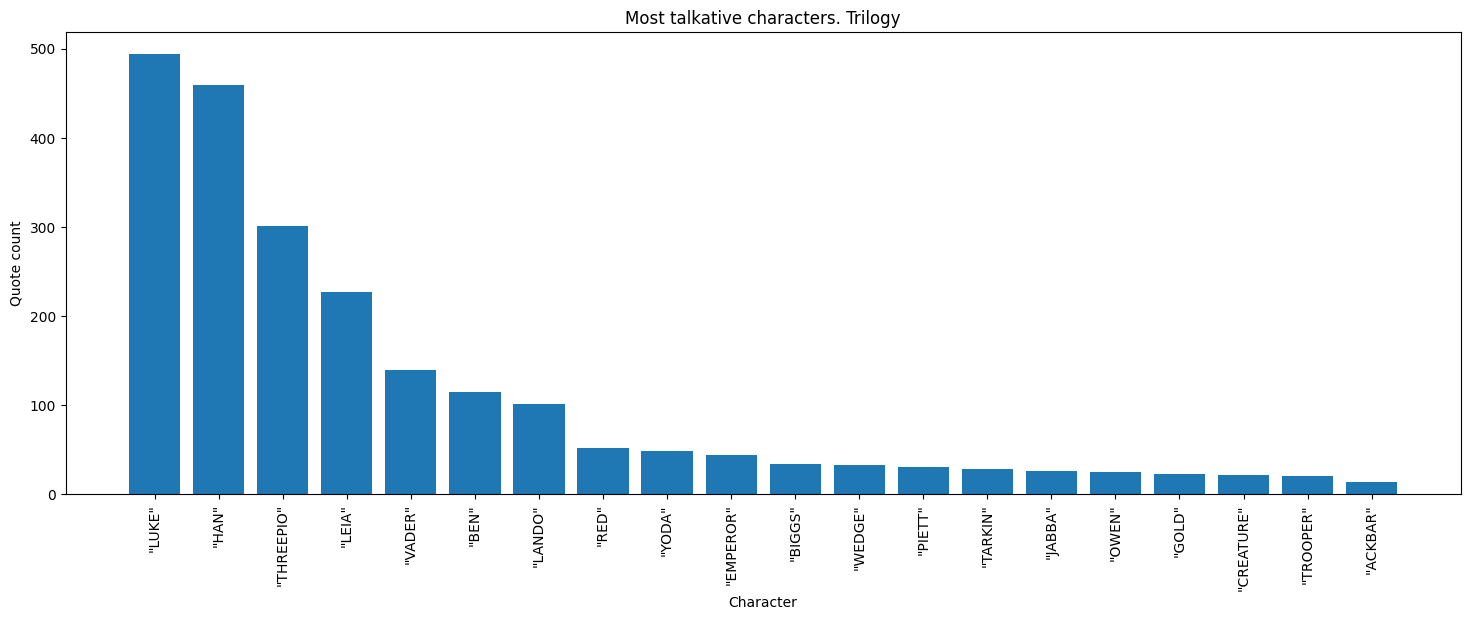

In [192]:
import os

results = [
    ('res4.txt', 'Episode IV'),
    ('res5.txt', 'Episode V'),
    ('res6.txt', 'Episode VI'),
    ('res_full.txt', 'Trilogy'),
]

for r, ep in results:
    print_result(r, ep)